In [28]:
import numpy as np, pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm 
from matplotlib import style
import statsmodels.stats.diagnostic as smd
import scipy.stats as stats
style.use("ggplot")

%matplotlib inline

# Lecture 18 - Rsidual Analysis

https://www.quantopian.com/lectures/residual-analysis

## Danger 1: Heteroscedasticity

One of the main assumptions behind a linear regression is that the underlying data has a constant variance. If there are some parts of the data with a variance different from another part the data is not appropriate for a linear regression. Heteroscedasticity is a term that refers to data with non-constant variance, as opposed to homoscedasticity, when data has constant variance.

Significant heteroscedasticity invalidates linear regression results by biasing the standard error of the model. As a result, we can't trust the outcomes of significance tests and confidence intervals generated from the model and its parameters.

To avoid these consequences it is important to use residual plots to check for heteroscedasticity and adjust if necessary.

As an example of detecting and correcting heteroscedasticity, let's consider yet another relationship between  X  and  Y :

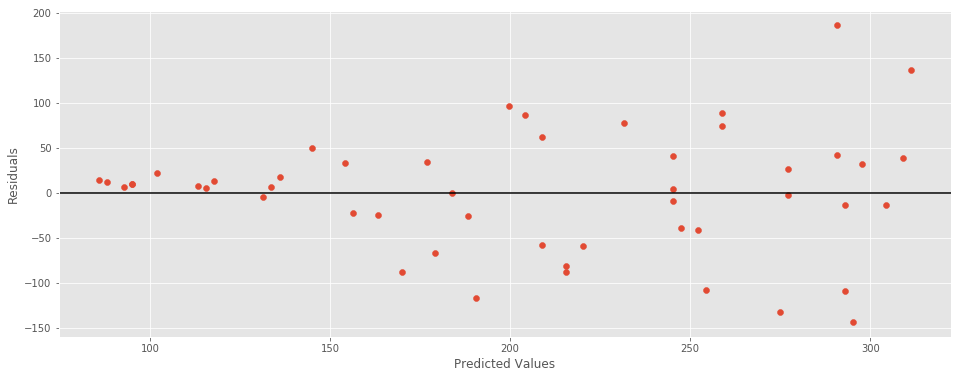

In [24]:
n = 50
X = np.random.randint(0, 100, n)
epsilon = np.random.normal(0, 1, n)
Y_heteroscedastic = 100 + 2*X + epsilon*X

model = sm.OLS(Y_heteroscedastic, sm.add_constant(X)).fit()
B0, B1 = model.params
residuals = model.resid

plt.figure(figsize = (16, 6))
plt.scatter(model.predict(), residuals);
plt.axhline(0, color='black')
plt.xlabel('Predicted Values');
plt.ylabel('Residuals');

Heteroscedasticity often manifests as this spread, giving us a tapered cloud in one direction or another. As we move along in the  x -axis, the magnitudes of the residuals are clearly increasing. A linear regression is unable to explain this varying variability and the regression standard errors will be biased.

## Statistical Methods for Detecting Heteroscedasticity

Generally, we want to back up qualitative observations on a residual plot with a quantitative method. The residual plot led us to believe that the data might be heteroscedastic. Let's confirm that result with a statistical test.

A common way to test for the presence of heteroscedasticity is the Breusch-Pagan hypothesis test. It's good to combine the qualitative analysis of a residual plot with the quantitative analysis of at least one hypothesis test. We can add the White test as well, but for now we will use only Breush-Pagan to test our relationship above. A function exists in the statsmodels package called het_breushpagan that simplifies the computation:

In [29]:
breusch_pagan_p = smd.het_breushpagan(model.resid, model.model.exog)[1]
print (breusch_pagan_p)
if breusch_pagan_p > 0.05:
    print ("The relationship is not heteroscedastic.")
if breusch_pagan_p < 0.05:
    print ("The relationship is heteroscedastic.")

0.0016996224094362681
The relationship is heteroscedastic.


/Users/miaoyuesun/anaconda3/lib/python3.5/site-packages/ipykernel_launcher.py:1: DeprecationWarning: `het_breushpagan` is deprecated, use `het_breuschpagan` instead!
Use het_breuschpagan, het_breushpagan will be removed in 0.9 
(Note: misspelling missing 'c')
  """Entry point for launching an IPython kernel.


We set our confidence level at  α=0.05 , so a Breusch-Pagan p-value below  0.05  tells us that the relationship is heteroscedastic. For more on hypothesis tests and interpreting p-values, refer to the lecture on hypothesis testing.. Using a hypothesis test bears the risk of a false positive or a false negative, which is why it can be good to confirm with additional tests if we are skeptical.

In [31]:
model.resid

array([-1.27184523e+01,  7.08134155e+00,  8.86870968e+01,  5.19603822e+00,
       -1.43413700e+02,  3.48568385e+01, -2.25101764e+01, -2.02884585e+00,
        4.83603230e+00, -1.07481767e+02, -1.30630972e+01,  9.94237688e+00,
        5.01301856e+01,  1.00469194e+01, -1.09325723e+02,  6.26851020e+01,
       -1.32810016e+02, -4.14000155e+01,  7.84407619e+01,  3.21782168e+01,
        7.41628126e+01, -5.81885310e+01,  4.12402721e+01, -3.90045623e+01,
        1.26184487e+01, -1.16704470e+02,  6.80835252e+00,  1.81903370e+01,
        8.67813498e+01, -8.33574175e+00,  1.86520093e+02, -6.64147216e+01,
        9.68976734e+01,  4.23793235e+01, -2.40265304e+01,  2.66753161e+01,
        1.37348239e+02,  3.86844453e+01, -8.75970765e+01, -8.14832015e+01,
       -4.42104421e+00, -5.91592591e+01,  2.27977319e+01,  8.20315592e+00,
       -2.57637280e+01,  1.41117145e+01,  3.32180493e+01,  1.29709016e+01,
       -8.78134585e+01, -2.50077428e-02])

In [30]:
model.model.exog

array([[ 1., 91.],
       [ 1., 21.],
       [ 1., 76.],
       [ 1., 13.],
       [ 1., 92.],
       [ 1., 40.],
       [ 1., 31.],
       [ 1., 84.],
       [ 1., 70.],
       [ 1., 74.],
       [ 1., 96.],
       [ 1.,  4.],
       [ 1., 26.],
       [ 1.,  4.],
       [ 1., 91.],
       [ 1., 54.],
       [ 1., 83.],
       [ 1., 73.],
       [ 1., 64.],
       [ 1., 93.],
       [ 1., 76.],
       [ 1., 54.],
       [ 1., 70.],
       [ 1., 71.],
       [ 1.,  1.],
       [ 1., 46.],
       [ 1.,  3.],
       [ 1., 22.],
       [ 1., 52.],
       [ 1., 70.],
       [ 1., 90.],
       [ 1., 41.],
       [ 1., 50.],
       [ 1., 90.],
       [ 1., 34.],
       [ 1., 84.],
       [ 1., 99.],
       [ 1., 98.],
       [ 1., 57.],
       [ 1., 57.],
       [ 1., 20.],
       [ 1., 59.],
       [ 1.,  7.],
       [ 1., 12.],
       [ 1., 45.],
       [ 1.,  0.],
       [ 1., 30.],
       [ 1., 14.],
       [ 1., 37.],
       [ 1., 43.]])